In [2]:
import parseTraces as pt
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch
import skimage
from sklearn.metrics import confusion_matrix

#### Brajdic Harle subject file list

In [3]:
subj_dict = {'p1.1_Female_20-29_170-179cm_Hand_held.out':[1607,5393],
              'p2.2_Male_20-29_180-189cm_Hand_held.out':[1999,5930],
              'p3.1_Male_20-29_170-179cm_Hand_held.out':[3057,8623],
              'p4.1_Male_20-29_170-179cm_Hand_held.out':[891,5425],
              'p5.1_Female_20-29_160-169cm_Hand_held.out':[1087,4956],
              'p6.1_Male_15-19_180-189cm_Hand_held.out':[2410,7400],
              'p7.1_Male_20-29_180-189cm_Hand_held.out':[1573,5249],
              'p8.1_Male_20-29_170-179cm_Hand_held.out':[1557,7596],
              'p9.1_Female_15-19_160-169cm_Hand_held.out':[1562,5614],
              #'p10.1_Male_20-29_170-179cm_Hand_held.dat':[6123,11092],
              'p11.1_Male_20-29_170-179cm_Hand_held.out':[1513,6361],
              #'p12.2_Male_15-19_180-189cm_Hand_held.dat':[3061,6744],
              'p13.1_Female_20-29_160-169cm_Hand_held.out':[2214,6828],
              'p14.1_Male_20-29_160-169cm_Hand_held.out':[1878,6203],
              'p15.1_Male_20-29_180-189cm_Hand_held.out':[1241,5295],
              'p16.1_Male_15-19_180-189cm_Hand_held.out':[3006,7487],
              'p17.1_Female_20-29_150-159cm_Hand_held.out':[2311,7629],
              'p18.1_Male_20-29_180-189cm_Hand_held.out':[971,5275],
              'p19.1_Female_20-29_150-159cm_Hand_held.out':[1869,6563],
              'p20.1_Male_20-29_170-179cm_Hand_held.out':[1573,5717],
              'p21.1_Male_20-29_180-189cm_Hand_held.out':[1346,4763],
              'p22.1_Male_20-29_170-179cm_Hand_held.out':[963,6582],
              #'p23.1_Female_20-29_160-169cm_Hand_held.out':[1363,6353],
              'p24.1_Male_20-29_170-179cm_Hand_held.out':[2182,5767],
              'p25.1_Female_20-29_170-179cm_Hand_held.out':[1359,5910],
              'p26.2_Female_20-29_150-159cm_Hand_held.out':[1166,5829]}
              #'p27.1_Male_15-19_170-179cm_Hand_held.dat':[7325,11053]}


In [4]:
def plot_acc(dict_element):

    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{dict_element[0]}')

    acc_x = [item[0] for item in accData][dict_element[1][0]:dict_element[1][1]]
    acc_y = [item[1] for item in accData][dict_element[1][0]:dict_element[1][1]]
    acc_z = [item[2] for item in accData][dict_element[1][0]:dict_element[1][1]]

    plt.figure()
    plt.plot(acc_x)
    plt.plot(acc_y)
    plt.plot(acc_z)
    plt.title(dict_element[0])
    plt.show;


In [5]:
def pull_acc_z(dict_element):

    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{dict_element[0]}')

    return [item[2] for item in accData][dict_element[1][0]:dict_element[1][1]]

In [6]:
def pull_acc_z_no_walk(dict_element):

    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{dict_element[0]}')

    return [item[2] for item in accData][:dict_element[1][0]]

#### Plot acceleration data

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

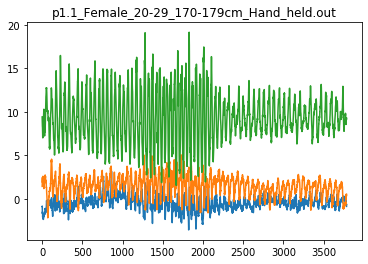

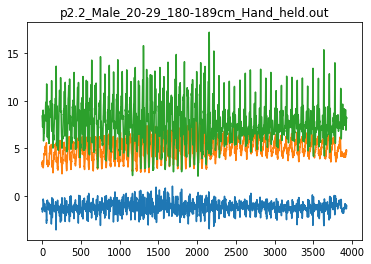

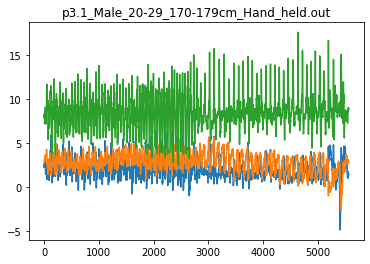

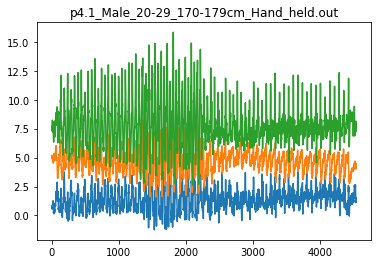

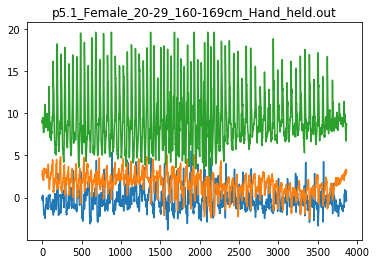

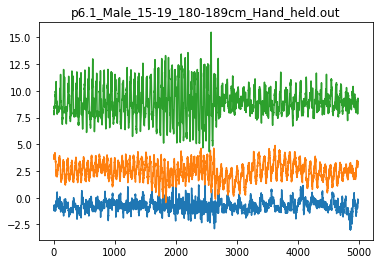

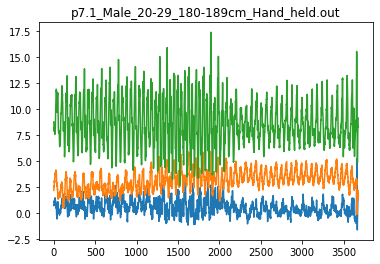

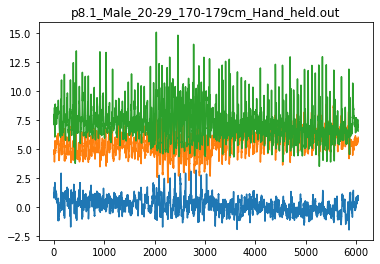

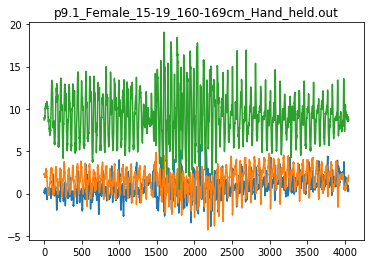

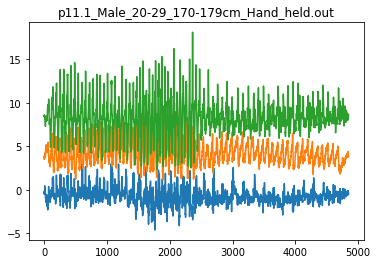

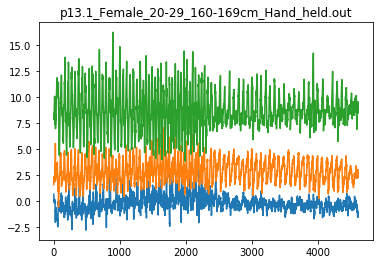

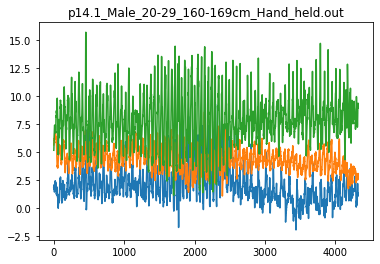

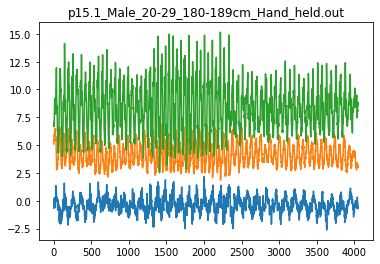

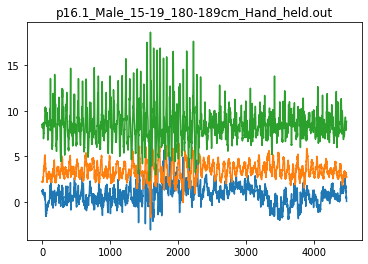

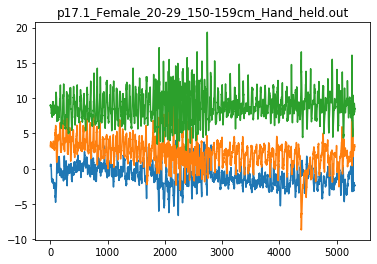

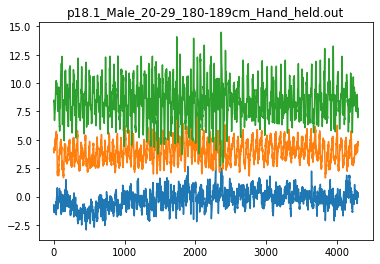

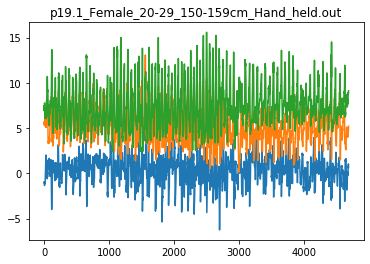

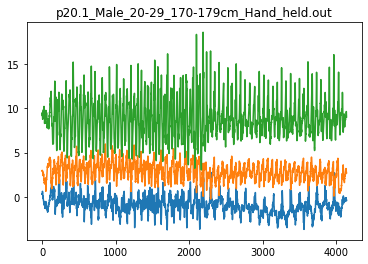

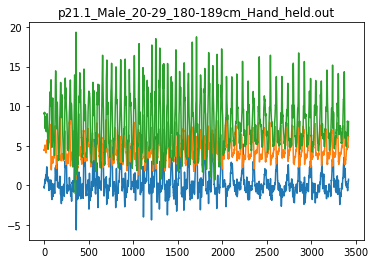

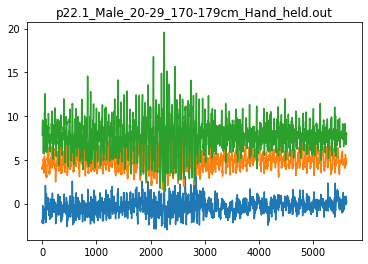

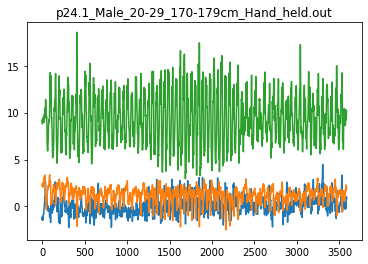

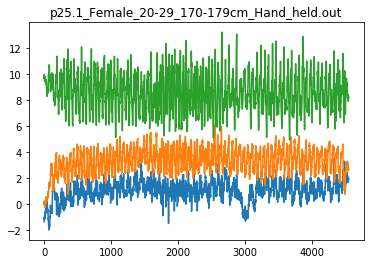

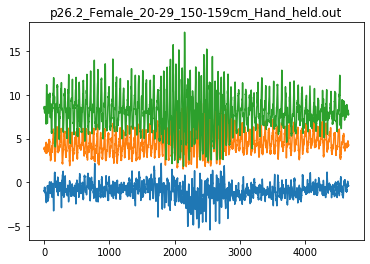

In [7]:
for subj in subj_dict.items():
    plot_acc(subj)

In [8]:
def plot_psd(dict_element):
    
    acc_z = pull_acc_z_no_walk(dict_element)
    
    f, psd = welch(acc_z[:250], fs=100, window='hanning', nperseg=256, detrend='constant')
    
    plt.figure()
    plt.plot(f, psd)
    plt.plot(f[np.argmax(psd)], max(psd), 'r*', MarkerSize=10)
    plt.xlim([0, 10]);


In [9]:
def pull_psd(dict_element):
    
    acc_z = pull_acc_z_no_walk(dict_element)
    
    f, psd = welch(acc_z, fs=100, window='hanning', nperseg=250, detrend='constant')
    

    return f, psd

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg 

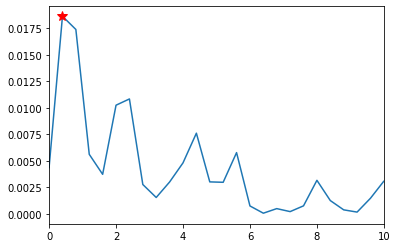

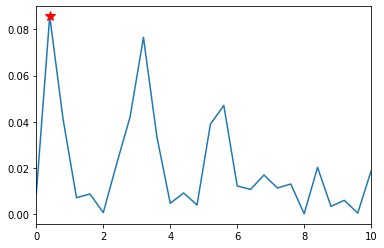

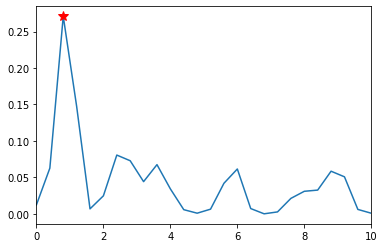

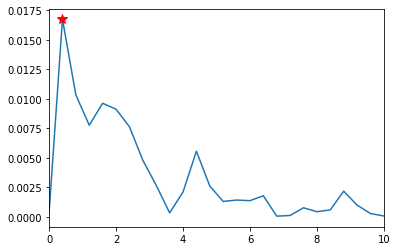

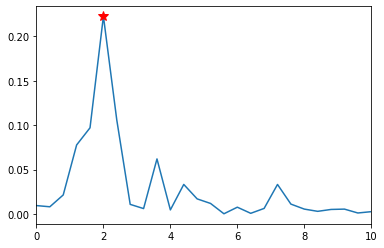

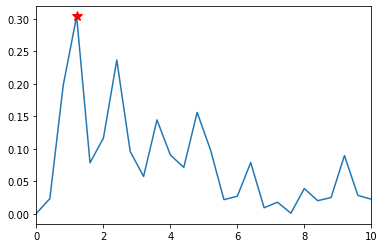

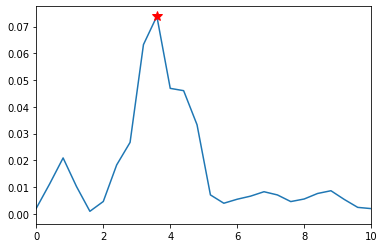

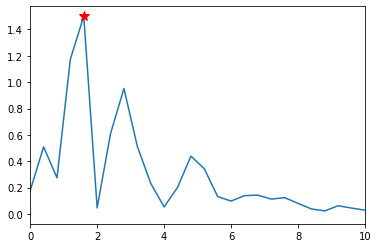

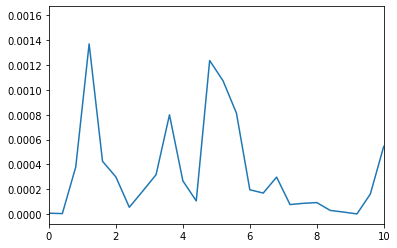

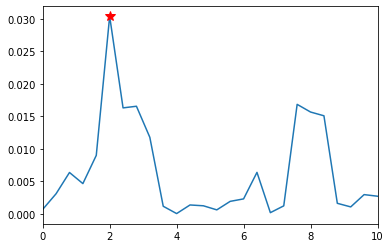

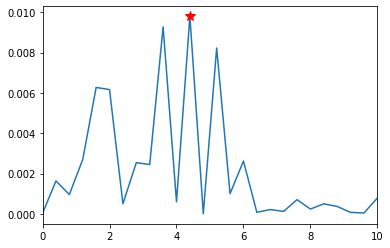

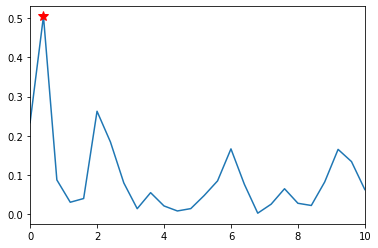

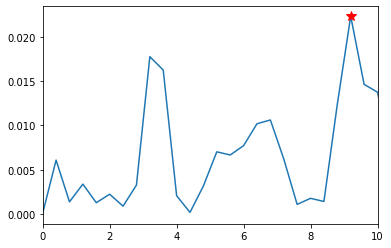

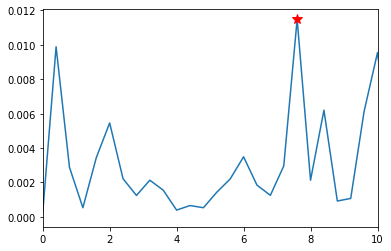

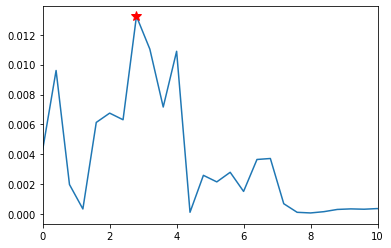

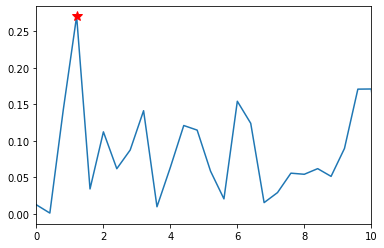

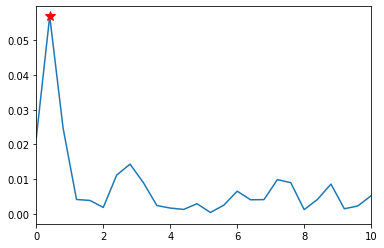

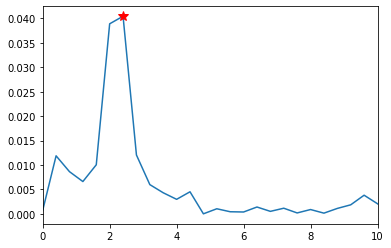

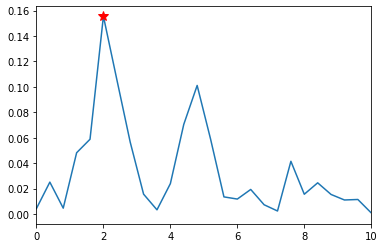

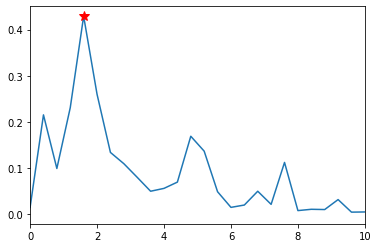

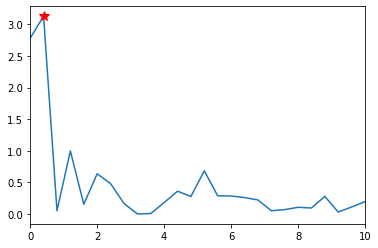

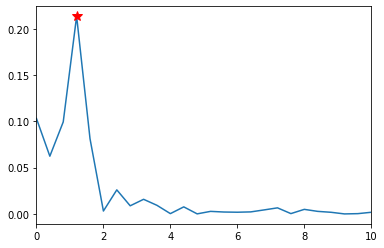

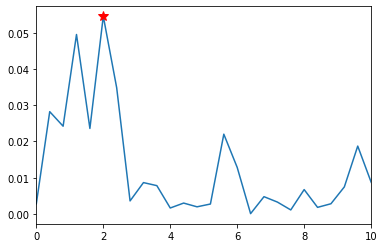

In [27]:
for subj in subj_dict.items():
    plot_psd(subj)

In [30]:
def round_down(num, divisor):
    return num - (num%divisor)

#### Create ground truth array of Brajdic Harle data

In [32]:
walk_gd = []
for subj in subj_dict.items():
    
    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{subj[0]}')

    data = np.zeros(round_down(len(accData), 50) + 1,)

    data[subj[1][0]:subj[1][1]] = 1

    subj_walk_gd = []
    for window in skimage.util.view_as_windows(data, 250, step=50):
        if sum(window) > 125:
            window = 1
        else:
            window = 0
        subj_walk_gd.append(window)
    
    walk_gd.append(subj_walk_gd)
    
walk_gd

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

#### Run fourier transform walk detection on Brajdic Harle

In [34]:
walk_detect = []

for subj in subj_dict.items():
    
    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{subj[0]}')
    
    acc_z = [item[2] for item in accData]

    subj_walk_detect = []
    
    for window in skimage.util.view_as_windows(np.array(acc_z), 250, step=50):
        
        f, psd = welch(window,fs=100,window='hanning',nperseg=250,detrend='constant')
        
        if np.mean(psd[2:6])>np.mean(psd[:2]) and np.mean(psd[2:6])>0.01:
            
            subj_walk_detect.append(1)
            
        else:
            
            subj_walk_detect.append(0)
    
    walk_detect.append(subj_walk_detect)


In [38]:
ground_truth = [item for sublist in walk_gd for item in sublist]
detector = [item for sublist in walk_detect for item in sublist]

print(len(ground_truth))
print(len(detector))

3308
3308


In [39]:
cm = confusion_matrix(ground_truth, detector)

#### Confusion matrix of walk detection test

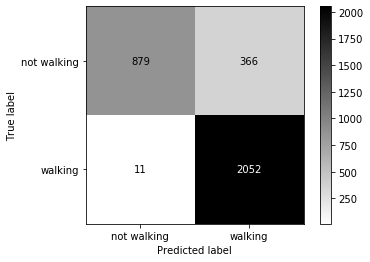

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['not walking', 'walking'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True,
                 cmap='binary', ax=None, xticks_rotation=None)

plt.show()